In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

### Q1 Download the data from the above link. How many ".csv" files are available in the dataset?

In [2]:
files = os.listdir()
count = 0
for i in files:
    if i[-4:] =='.csv':
        count = count+1
print("Number of csv files:", count)

Number of csv files: 4


### Q2 What is the shape of "movies.csv"?

In [3]:
movie = pd.read_csv('movies.csv')
print(movie.shape)

(9742, 3)


### Q3 What is the shape of "ratings.csv"?


In [4]:
rating = pd.read_csv('ratings.csv')
print(rating.shape)

(100836, 4)


### Q4 How many unique "userId" are available in "ratings.csv"?


In [5]:
rating['userId'].nunique()

610

### Q5 Which movie has recieved maximum number of user ratings?

In [6]:
movie_rating = movie.merge(rating, how = 'outer', on='movieId')
movie_rating.groupby(['movieId','title'])['rating'].count().sort_values(ascending=False)

movieId  title                           
356      Forrest Gump (1994)                 329
318      Shawshank Redemption, The (1994)    317
296      Pulp Fiction (1994)                 307
593      Silence of the Lambs, The (1991)    279
2571     Matrix, The (1999)                  278
                                            ... 
1076     Innocents, The (1961)                 0
34482    Browning Version, The (1951)          0
25855    Roaring Twenties, The (1939)          0
85565    Chalet Girl (2011)                    0
26085    Mutiny on the Bounty (1962)           0
Name: rating, Length: 9742, dtype: int64

### Q6 Select all the correct tags submitted by users to "Matrix, The (1999)" movie?


In [7]:
tags = pd.read_csv('tags.csv')
tag_movies = movie.merge(tags, how='outer', on='movieId')
tag_movies[tag_movies['title']=="Matrix, The (1999)"]

,movieId,title,genres,userId,tag,timestamp
2674,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,424.0,martial arts,1.457843e+09
2675,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,424.0,sci-fi,1.457843e+09
2676,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,474.0,alternate universe,1.137205e+09
2677,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,537.0,philosophy,1.424141e+09
2678,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,537.0,post apocalyptic,1.424141e+09


### Q7 What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?


In [8]:
movie_rating[movie_rating['title']=="Terminator 2: Judgment Day (1991)"]['rating'].mean().round(2)

3.97

### Q8 How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?


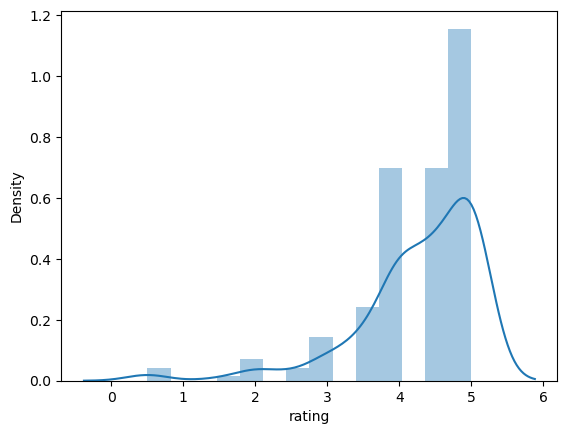

In [9]:
rating_fight_club = movie_rating[movie_rating['title'] == 'Fight Club (1999)']['rating']
sns.distplot(rating_fight_club, kde = True)
plt.show()

### Important Note 1

In [10]:
grouped_df = rating.groupby(['movieId'])['rating'].agg(['count', 'mean']).reset_index()
grouped_df

,movieId,count,mean
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


In [11]:
movie_grouped_df = movie.merge(grouped_df, how = 'inner', on= 'movieId')
movie_grouped_df2 = movie_grouped_df[movie_grouped_df['count']>50]
movie_grouped_df2.head()

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


### Q9. Which movie is the most popular based on  average user ratings?


In [12]:
max_avg_rating = movie_grouped_df2['mean'].max()
movie_grouped_df2[movie_grouped_df2['mean'] == max_avg_rating]

,movieId,title,genres,count,mean
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022


### Q10 Select all the correct options which comes under top 5 popular movies based on number of user ratings.


In [13]:
movie_grouped_df2.sort_values(by=['count'], ascending = False).head(5)

,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


### Q11 Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [14]:
sci_fi_movie = movie_grouped_df2['genres'].str.contains('Sci-Fi')
movie_grouped_df2[sci_fi_movie].sort_values(by = 'count', ascending=False).head(3)

,movieId,title,genres,count,mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000


In [16]:
links = pd.read_csv('links.csv')
links_movie_50rating = movie_grouped_df2.merge(links, how='inner', on='movieId')

In [55]:
scrape_data = links_movie_50rating.copy()
scrape_data.head()

,movieId,title,genres,count,mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0


### Scraping Data As per Important Note 2

In [19]:
import requests
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import undetected_chromedriver as uc

In [26]:
driver = uc.Chrome()
driver.set_window_size(1920, 1080)
imdb_id = []
rating = []
for imdbid in scrape_data['imdbId']:
    if len(str(imdbid)) == 5:
        url = f"http://www.imdb.com/title/tt00{imdbid}/"
    elif len(str(imdbid)) == 6:
        url = f"http://www.imdb.com/title/tt0{imdbid}/"
    elif len(str(imdbid)) == 7:
        url = f"http://www.imdb.com/title/tt{imdbid}/"
    driver.get(url)
    time.sleep(3)
    content = driver.page_source
    soup = BeautifulSoup(content, 'html.parser')
    rate = soup.find('span',{'class':"sc-bde20123-1 cMEQkK"}).text
    if rate:
        rating.append(rate)
    else:
        rating.append(-1)
    imdb_id.append(imdbid)
    time.sleep(2)

In [34]:
scraped_imbd_data = pd.DataFrame([imdb_id, rating], index = ['imdbId', 'rating']).T
scraped_imbd_data

,imdbId,rating
0,114709,8.3
1,113497,7.1
2,113228,6.6
3,113277,8.3
4,114319,6.3
...,...,...
431,993846,8.2
432,2278388,8.1
433,816692,8.7
434,2015381,8.0


In [39]:
imbd_rating_data = scrape_data.merge(scraped_imbd_data, how = 'inner', on='imdbId')
imbd_rating_data.head()

,movieId,title,genres,count,mean,imdbId,tmdbId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0,8.3
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0,7.1
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0,6.6
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0,8.3
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0,6.3


### Q12. Mention the movieId of the movie which has the highest IMDB rating.


In [45]:
highest_rating = imbd_rating_data['rating'].max()
imbd_rating_data[imbd_rating_data['rating']==highest_rating]

,movieId,title,genres,count,mean,imdbId,tmdbId,rating
53,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022,111161,278.0,9.3


### Q13. Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating

In [54]:
scific = imbd_rating_data[imbd_rating_data['genres'].str.contains('Sci-Fi')]
highest_rating = scific['rating'].max()
scific[scific['rating'] == highest_rating]

,movieId,title,genres,count,mean,imdbId,tmdbId,rating
424,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143,4.066434,1375666,27205.0,8.8
